In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation

from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

# Penguins

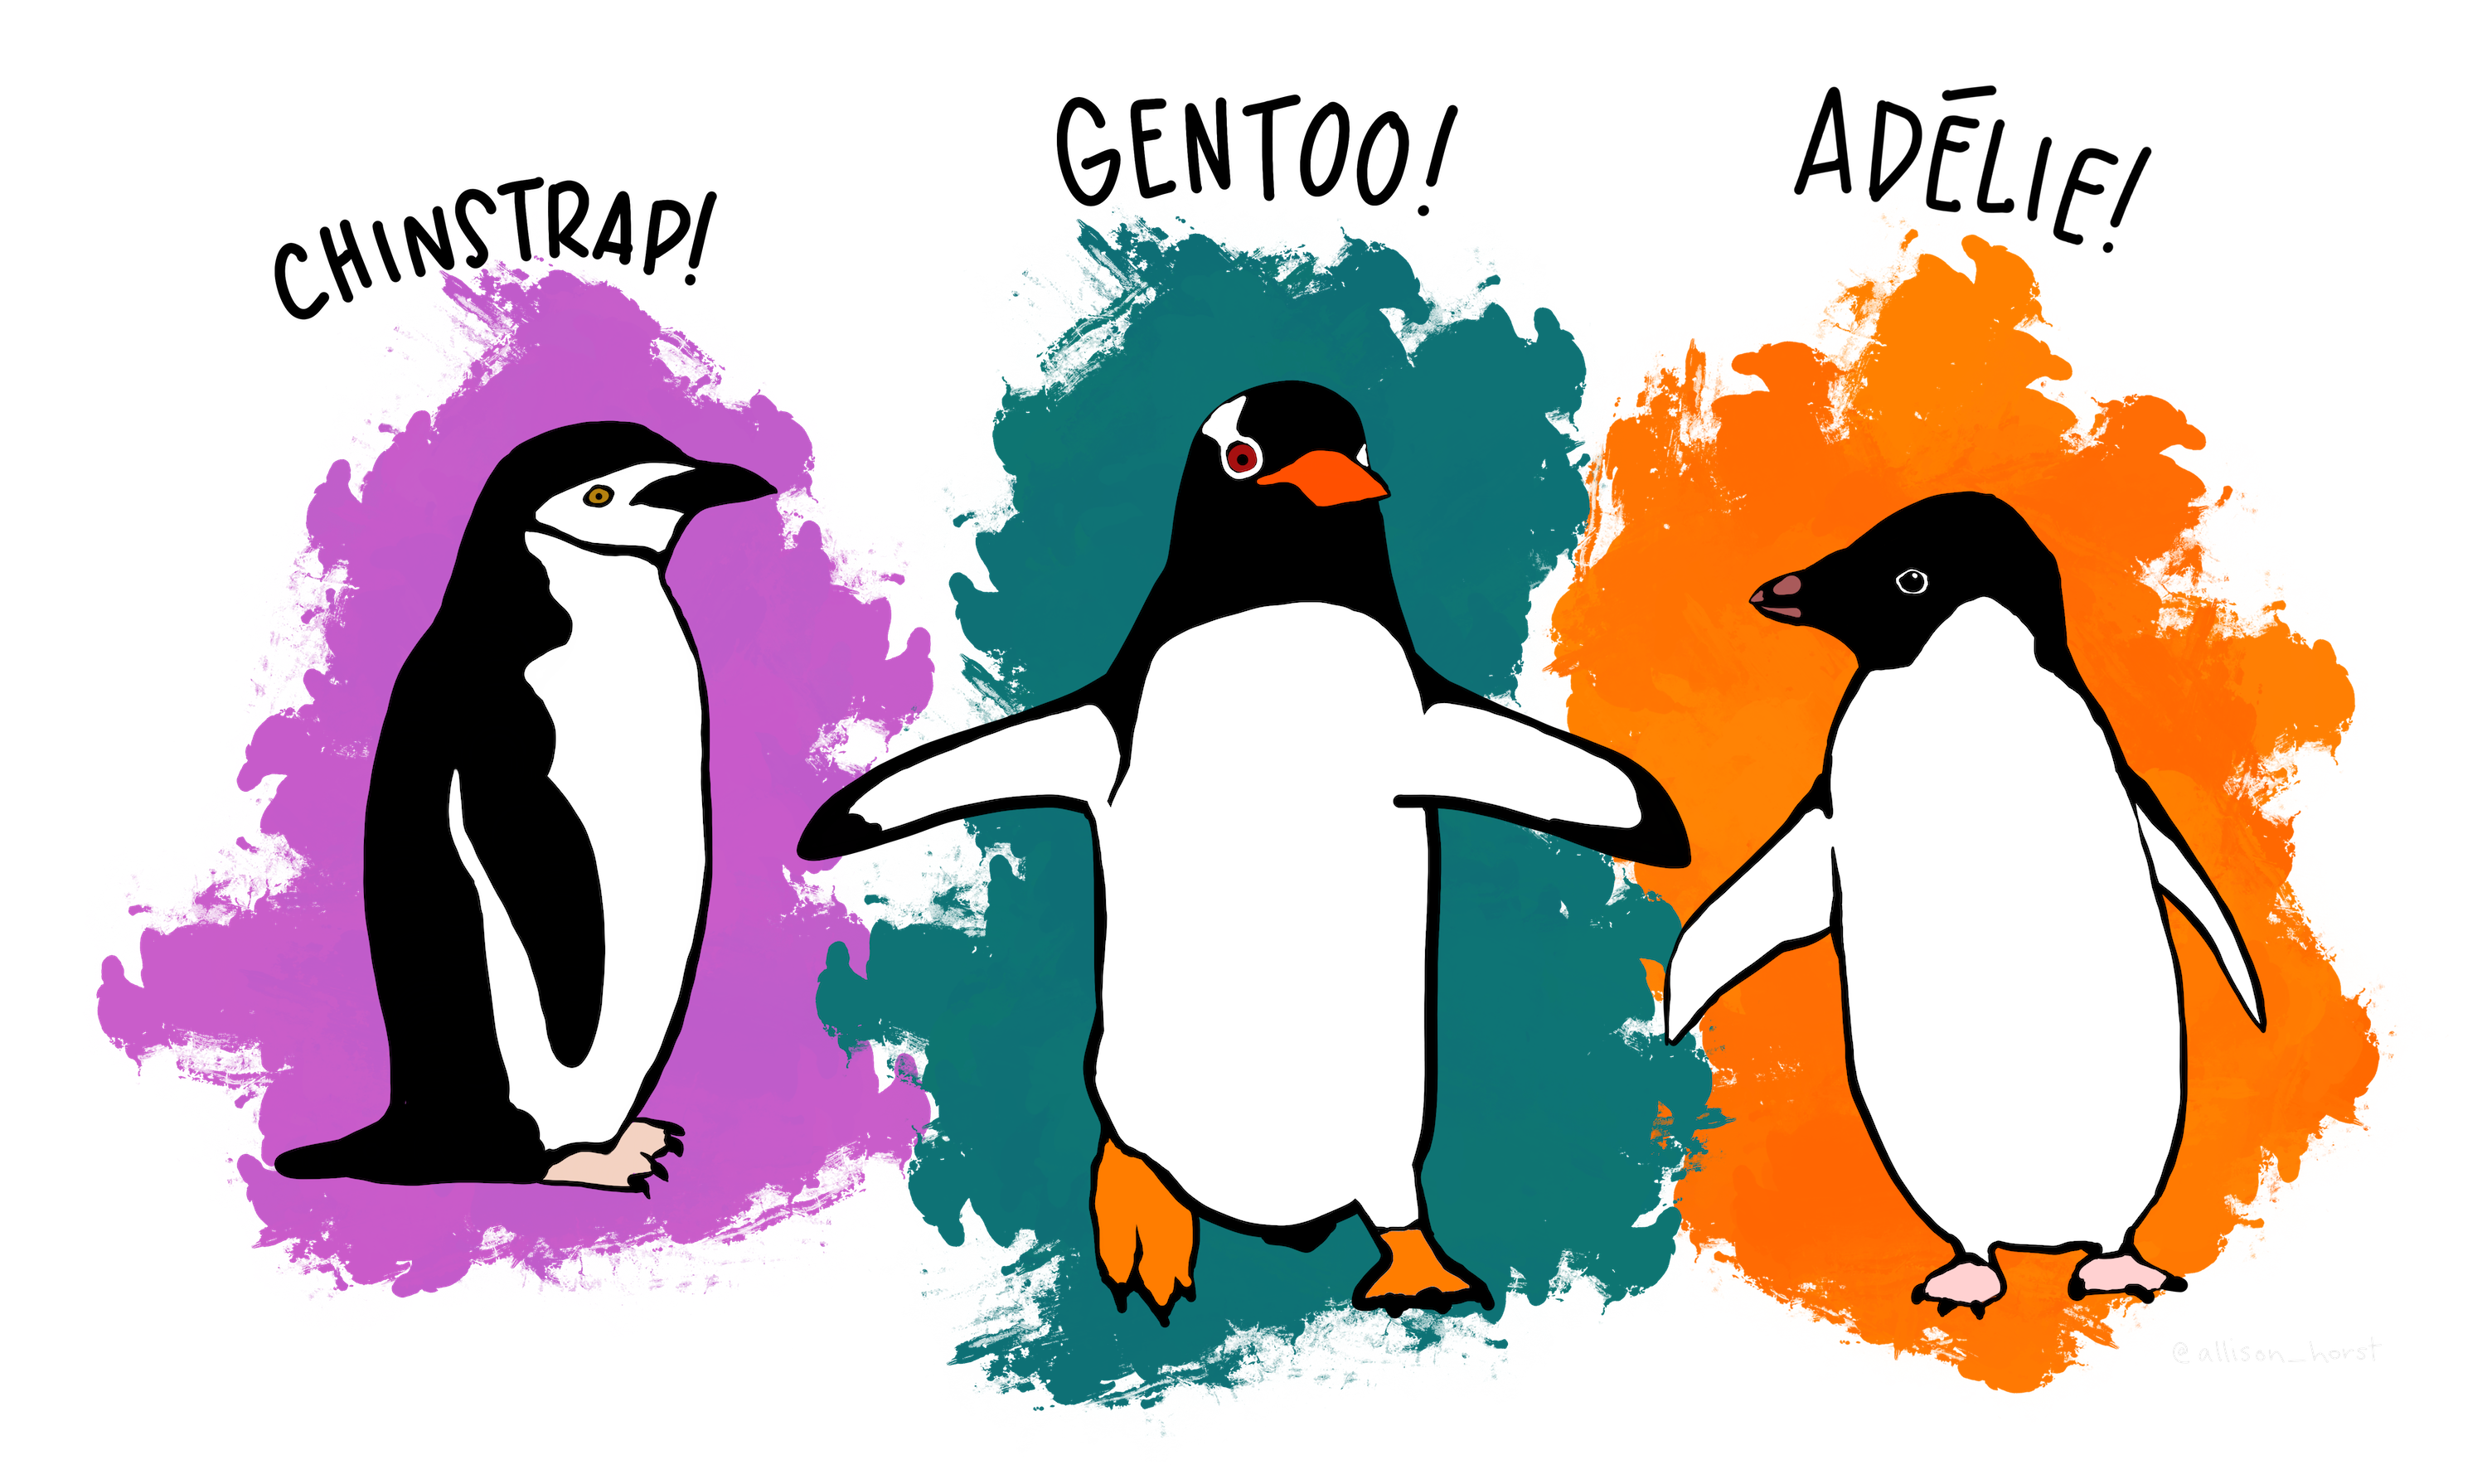

Read the file penguins.csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/penguins.csv')
df.tail(20)

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
324,51.5,18.7,187.0,3250.0,2
325,49.8,17.3,198.0,3675.0,2
326,48.1,16.4,199.0,3325.0,2
327,51.4,19.0,201.0,3950.0,2
328,45.7,17.3,193.0,3600.0,2
329,50.7,19.7,203.0,4050.0,2
330,42.5,17.3,187.0,3350.0,2
331,52.2,18.8,197.0,3450.0,2
332,45.2,16.6,191.0,3250.0,2
333,49.3,19.9,203.0,4050.0,2


Get some general info about the dataset (type of each column, null values, ...)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342 entries, 0 to 343
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CulmenLength   342 non-null    float64
 1   CulmenDepth    342 non-null    float64
 2   FlipperLength  342 non-null    float64
 3   BodyMass       342 non-null    float64
 4   Species        342 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 16.0 KB


Drop rows containing NaN values.  
Check afterwards if there are no nulls left.

In [4]:
df = df.dropna()

What is X and what is y?

In [6]:
X = df.drop("Species",axis=1)
y = df["Species"]


What is X_train, y_train, X_test, y_test?

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

What is X_train, y_train, X_val, y_val?

In [8]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.15,random_state=42)

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

In [11]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


(246, 4)
(44, 4)
(52, 4)
(246,)
(44,)
(52,)


Standardize the data before providing it as training data.  
You should only use the training data to fit the scaler transformation and use the same fitted object to transform the validation and test input data.

In [12]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

Create a small ANN model.
Compile it and evaluate it.  
Choose an appropriate value for the number of epochs

In [13]:
import tensorflow as ts

from tensorflow import keras

model = keras.models.Sequential()

model.add(keras.layers.Dense(128, activation="relu", input_dim = X_train_scaled.shape[1]))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))



In [14]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [15]:
history = model.fit(X_train_scaled,y_train,epochs=15,validation_data=(X_val_scaled,y_val))

Epoch 1/15
8/8 [==============================] - 0s 27ms/step - loss: 1.1555 - accuracy: 0.1463 - val_loss: 1.1106 - val_accuracy: 0.2727
Epoch 2/15
8/8 [==============================] - 0s 3ms/step - loss: 1.0778 - accuracy: 0.5244 - val_loss: 1.0352 - val_accuracy: 0.7727
Epoch 3/15
8/8 [==============================] - 0s 3ms/step - loss: 1.0073 - accuracy: 0.7805 - val_loss: 0.9681 - val_accuracy: 0.7727
Epoch 4/15
8/8 [==============================] - 0s 3ms/step - loss: 0.9437 - accuracy: 0.7886 - val_loss: 0.9080 - val_accuracy: 0.7727
Epoch 5/15
8/8 [==============================] - 0s 3ms/step - loss: 0.8870 - accuracy: 0.7886 - val_loss: 0.8540 - val_accuracy: 0.7727
Epoch 6/15
8/8 [==============================] - 0s 3ms/step - loss: 0.8355 - accuracy: 0.7886 - val_loss: 0.8036 - val_accuracy: 0.7727
Epoch 7/15
8/8 [==============================] - 0s 3ms/step - loss: 0.7878 - accuracy: 0.7886 - val_loss: 0.7562 - val_accuracy: 0.7727
Epoch 8/15
8/8 [=================

How well does the model perform on the test set?

In [16]:
model.evaluate(X_test_scaled,y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.9231


[0.45635393261909485, 0.9230769276618958]

Make the following plot. Notice that Train and Validation are 'moving in the same direction'. This means that as the training goes on, the results for the validation set becomes better. Which is important!!

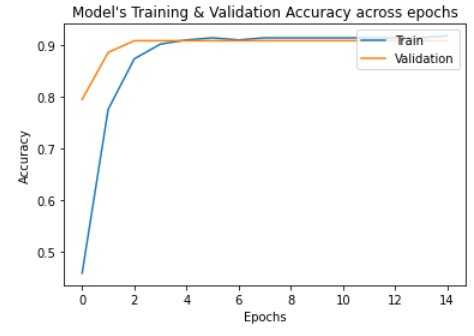

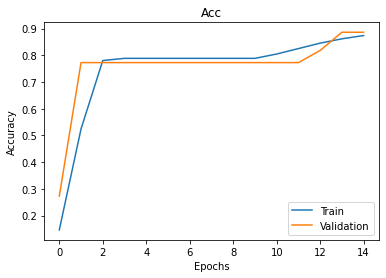

In [18]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Acc")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='lower right')
plt.show()


Save the model

In [15]:
model.save('penguins_model.h5')

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

# Breast Cancer

In the following code you have to create an ANN model to predict breast cancer. The steps will be almost exactly the same as for the penguins, but you will have to make some changes
* In the breast cancer datafile, the outcome is M or B. This will give problems
* You will have to make some changes to the output layer (e.g. the activation function) and to the loss function and the optimizer 

Read the file wdbc.csv

In [16]:
df = pd.read_csv('https://raw.githubusercontent.com/jdecorte/machinelearning/main/datasets/wdbc.csv')
# !! it is really important to give each of the columns an (appropriate) name, 
# otherwise you will get an error: all-features-must-be-in-0-9-or-10-0
# https://stackoverflow.com/questions/65789613/all-features-must-be-in-0-9-or-10-0
df.columns = ['id','diagnosis','radius','texture','perimeter','area','smoothness','compactness','concavity','concave points','symmetry','fractal dimension','radius_std','texture_std','perimeter_std','area_std','smoothness_std','compactness_std','concavity_std','concave points_std','symmetry_std','fractal dimension_std','radius_lg','texture_lg','perimeter_lg','area_lg','smoothness_lg','compactness_lg','concavity_lg','concave points_lg','symmetry_lg','fractal dimension_lg']
df.head()

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,...,radius_lg,texture_lg,perimeter_lg,area_lg,smoothness_lg,compactness_lg,concavity_lg,concave points_lg,symmetry_lg,fractal dimension_lg
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


Get some general info about the dataset (type of each column, null values, ...)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     568 non-null    int64  
 1   diagnosis              568 non-null    object 
 2   radius                 568 non-null    float64
 3   texture                568 non-null    float64
 4   perimeter              568 non-null    float64
 5   area                   568 non-null    float64
 6   smoothness             568 non-null    float64
 7   compactness            568 non-null    float64
 8   concavity              568 non-null    float64
 9   concave points         568 non-null    float64
 10  symmetry               568 non-null    float64
 11  fractal dimension      568 non-null    float64
 12  radius_std             568 non-null    float64
 13  texture_std            568 non-null    float64
 14  perimeter_std          568 non-null    float64
 15  area_s

In the breast cancer datafile, the outcome is M or B. This will give problems. Try to solve this.

What is X? What is y?

What is X_train, y_train, X_test, y_test?

What is X_train, y_train, X_val, y_val?

What are the dimensions of X_train, X_val, X_test, y_train, y_val, y_test?

Shape of x_train: (347, 30)
Shape of x_test: (86, 30)
Shape of x_val: (62, 30)
Shape of y_train: (347,)
Shape of y_test: (86,)
Shape of y_val: (62,)


Standardize the data before providing it as training data.  
You should only use the training data to fit the scaler transformation and use the same fitted object to transform the validation and test input data.

Create a small ANN model.
Compile it and evaluate it.

Epoch 1/80
35/35 [==============================] - 0s 3ms/step - loss: 0.6652 - accuracy: 0.4640 - val_loss: 0.6236 - val_accuracy: 0.6613
Epoch 2/80
35/35 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.7839 - val_loss: 0.5384 - val_accuracy: 0.8065
Epoch 3/80
35/35 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8790 - val_loss: 0.4689 - val_accuracy: 0.8387
Epoch 4/80
35/35 [==============================] - 0s 997us/step - loss: 0.3927 - accuracy: 0.9078 - val_loss: 0.4097 - val_accuracy: 0.8548
Epoch 5/80
35/35 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.9280 - val_loss: 0.3619 - val_accuracy: 0.8710
Epoch 6/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2841 - accuracy: 0.9251 - val_loss: 0.3251 - val_accuracy: 0.8710
Epoch 7/80
35/35 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 0.9366 - val_loss: 0.2977 - val_accuracy: 0.8871
Epoch 8/80
35/35 [

How well does the model performs on the test set?

3/3 [==============================] - 0s 997us/step - loss: 0.1753 - accuracy: 0.9535


[0.1752835214138031, 0.9534883499145508]

Make the following plot

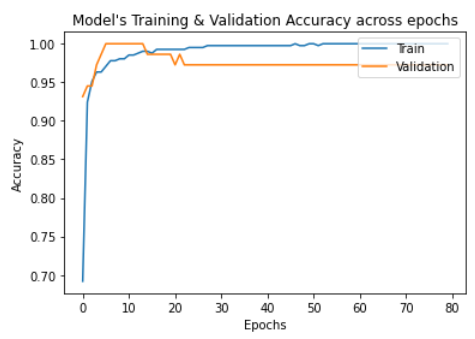

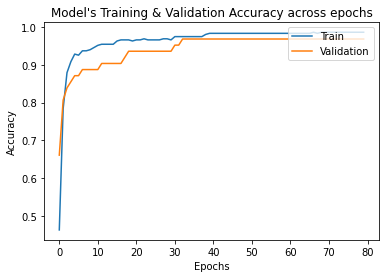

Save the model